<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** BIG DATA ANALYTICS: ANÁLISE ESTATÍSTICA - 91162 - 2022.2 - 01D - Trilha 5.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/AE_T5.ipynb<br>
***

### **Atividade - Trilha 5**

#### **Problema 1**

Neste exercício vamos fazer uma análise de regressão multivariada com a mesma base de dados "autos.csv" para tentar prever o preço do carro a partir das seguintes variáveis: potência (horsepower), comprimento (length), tamanho do motor (engine.size), consumo na cidade (city.mpg).

Utilizando então a base disponibilizada, você deve:

a) Ajustar um modelo de regressão linear sendo **"price"** a variável alvo (resposta), como função das demais variáveis citadas acima: **"horsepower"**, **"length"**, **"engine.size"**, **"city.mpg"**.

b) Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

c) Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

d) Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

### **Carregando bibliotecas necessárias:**

In [2]:
# install.packages("ggpubr")
# install.packages("ggfortify")
# install.packages("ggally")
library(tidyverse)
library(ggplot2)
library(readr)
library(ggpubr)
library(ggfortify)
library(GGally)

### **Resolução:**

---
#### **Problema 1**
---

**Item a)**

Carregando o dataset.

In [3]:
# definindo o diretório de datasets
setwd('../data')

# lendo o dataset
data <- read.csv('autos.csv', sep=",", header=T); head(data)

# exibindo a estrutura dos dados do dataset
str(data)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

Fazendo alguns ajustes no dataset.

In [5]:
# ajustando o tipo de dado de algumas variáveis do dataset
data$bore <- as.numeric(data$bore)
data$stroke <- as.numeric(data$stroke)
data$horsepower <- as.numeric(data$horsepower)
data$peak.rpm <- as.numeric(data$peak.rpm)
data$price <- as.numeric(data$price)

# exibindo novamente a estrutura dos dados do dataset
str(data)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

In [6]:
# verificando se existem valores faltantes no dataset (NAs)
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
symboling,0
normalized.losses,0
make,0
fuel.type,0
aspiration,0
num.of.doors,0
body.style,0
drive.wheels,0
engine.location,0


In [7]:
# criando um novo dataset com os tipos de dados ajustados e os valores faltantes removidos
autos <- data %>% drop_na()

# visualizando o início do dataset
head(autos)

# visualizando o final do dataset
tail(autos)

# exibindo a estrutura dos dados do novo dataset
str(autos)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
190,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,⋯,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
191,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
192,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
193,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,⋯,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
194,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,⋯,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
195,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,⋯,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

In [8]:
# verificando se ainda existem valores faltantes no dataset (NAs)
as.data.frame(colSums(is.na(autos)))

,colSums(is.na(autos))
,<dbl>
symboling,0
normalized.losses,0
make,0
fuel.type,0
aspiration,0
num.of.doors,0
body.style,0
drive.wheels,0
engine.location,0


Aparentemente, todos os dados foram carregados e estão identificados corretamente. O dataset é composto por 195 observações de 26 variáveis.

Criando um dataframe a partir do dataset "autos", filtrando somente as variáveis de interesse. Exibindo também a estrutura e o sumário estatístico do dataframe criado.

In [9]:
# criando um dataframe a partir do dataset "autos"
autos_df <- as.data.frame(autos[,c('price', 'horsepower', 'length', 'engine.size', 'city.mpg')])

# exibindo a estrutura do dataframe
cat('Estrutura do dataframe "autos_df":', '\n')
cat('----------------------------------', '\n', '\n')
str(autos_df)

# exibindo o sumário estatístico do dataframe
cat('\n')
cat('Sumário Estatístico do dataframe "autos_df":', '\n')
cat('--------------------------------------------', '\n')
summary(autos_df)

Estrutura do dataframe "autos_df": 
---------------------------------- 
 
'data.frame':	195 obs. of  5 variables:
 $ price      : num  13495 16500 16500 13950 17450 ...
 $ horsepower : num  111 111 154 102 115 110 110 110 140 101 ...
 $ length     : num  169 169 171 177 177 ...
 $ engine.size: int  130 130 152 109 136 136 136 136 131 108 ...
 $ city.mpg   : int  21 21 19 24 18 19 19 19 17 23 ...

Sumário Estatístico do dataframe "autos_df": 
-------------------------------------------- 


     price         horsepower        length       engine.size   
 Min.   : 5118   Min.   : 48.0   Min.   :141.1   Min.   : 61.0  
 1st Qu.: 7756   1st Qu.: 70.0   1st Qu.:166.3   1st Qu.: 98.0  
 Median :10245   Median : 95.0   Median :173.2   Median :120.0  
 Mean   :13248   Mean   :103.3   Mean   :174.3   Mean   :127.9  
 3rd Qu.:16509   3rd Qu.:116.0   3rd Qu.:184.1   3rd Qu.:145.5  
 Max.   :45400   Max.   :262.0   Max.   :208.1   Max.   :326.0  
    city.mpg    
 Min.   :13.00  
 1st Qu.:19.50  
 Median :25.00  
 Mean   :25.37  
 3rd Qu.:30.00  
 Max.   :49.00  

Abaixo, gráficos de dispersão relacionando a variável "price" com as variáveis "horsepower", "length", "engine.size" e "city.mpg".

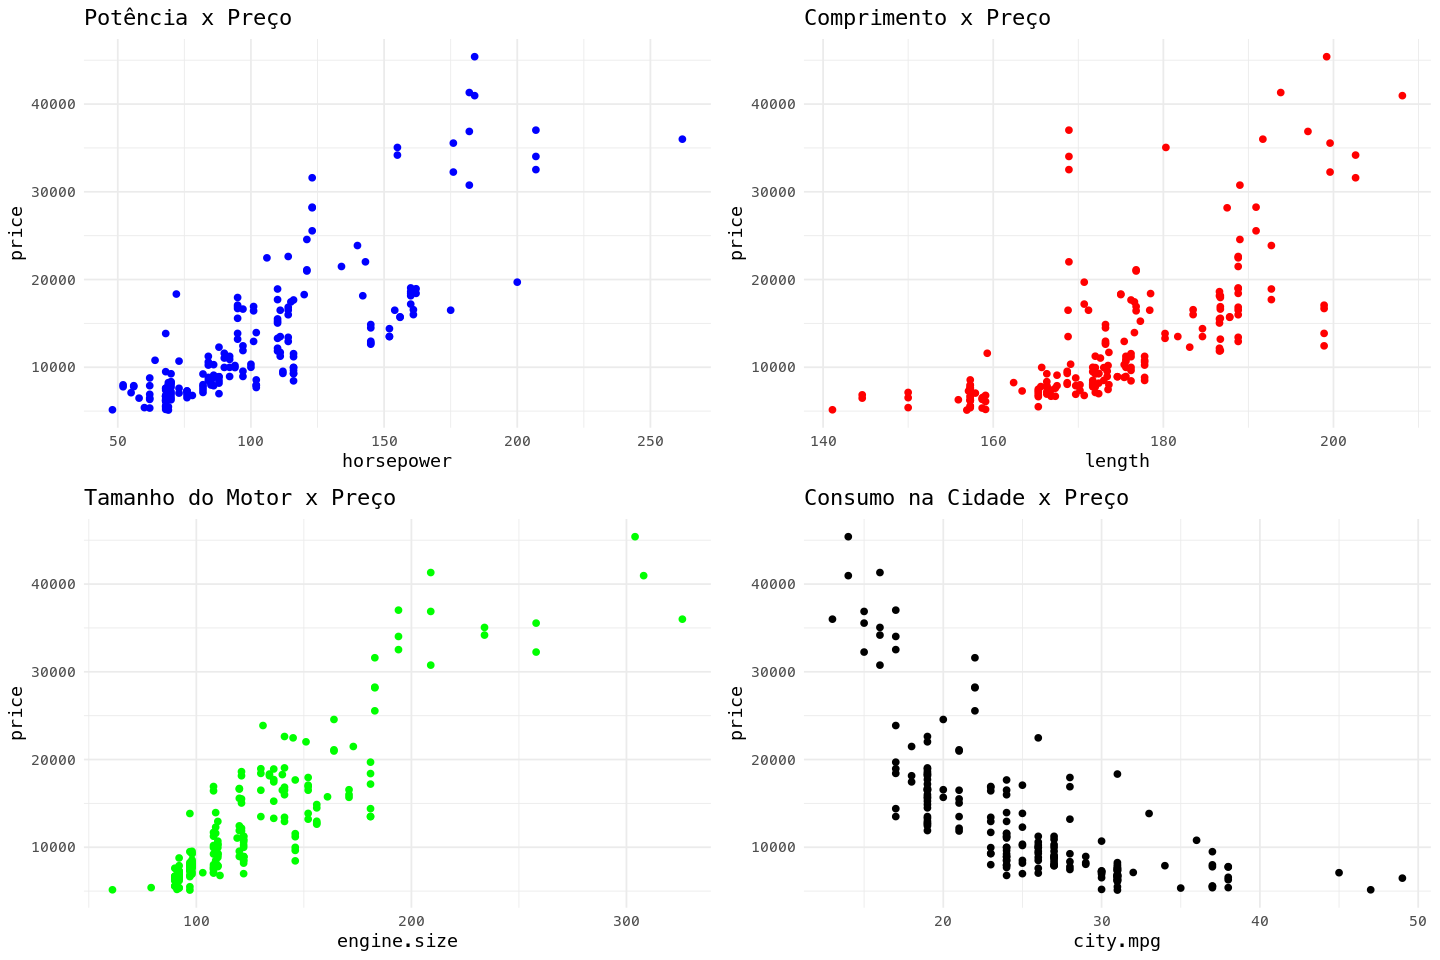

In [10]:
# configurando a área de plotagem dos gráficos
options(repr.plot.width=12, repr.plot.height=8)

# montando os gráficos
Horsepower  <- ggplot(autos_df, aes(x=horsepower, y=price)) +
                geom_point(color='blue', alpha=1) +
                theme_minimal() +
                ggtitle('Potência x Preço')
Length      <- ggplot(autos_df, aes(x=length, y=price)) +
                geom_point(color='red', alpha=1) +
                theme_minimal() +
                ggtitle('Comprimento x Preço')
Engine.size <- ggplot(autos_df, aes(x=engine.size, y=price)) +
                geom_point(color='green', alpha=1) +
                theme_minimal() +
                ggtitle('Tamanho do Motor x Preço')
City.mpg    <- ggplot(autos_df, aes(x=city.mpg, y=price)) +
                geom_point(color='black', alpha=1) +
                theme_minimal() +
                ggtitle('Consumo na Cidade x Preço')

# exibindo os gráficos
ggarrange(ncol=2, nrow=2, Horsepower, Length , Engine.size, City.mpg)

**Item a)**

Ajustar um modelo de regressão linear sendo **"price"** a variável alvo (resposta), como função das variáveis: **"horsepower"**, **"length"**, **"engine.size"**, **"city.mpg"**.

Visualizando a matriz das correlações entre as variáveis.

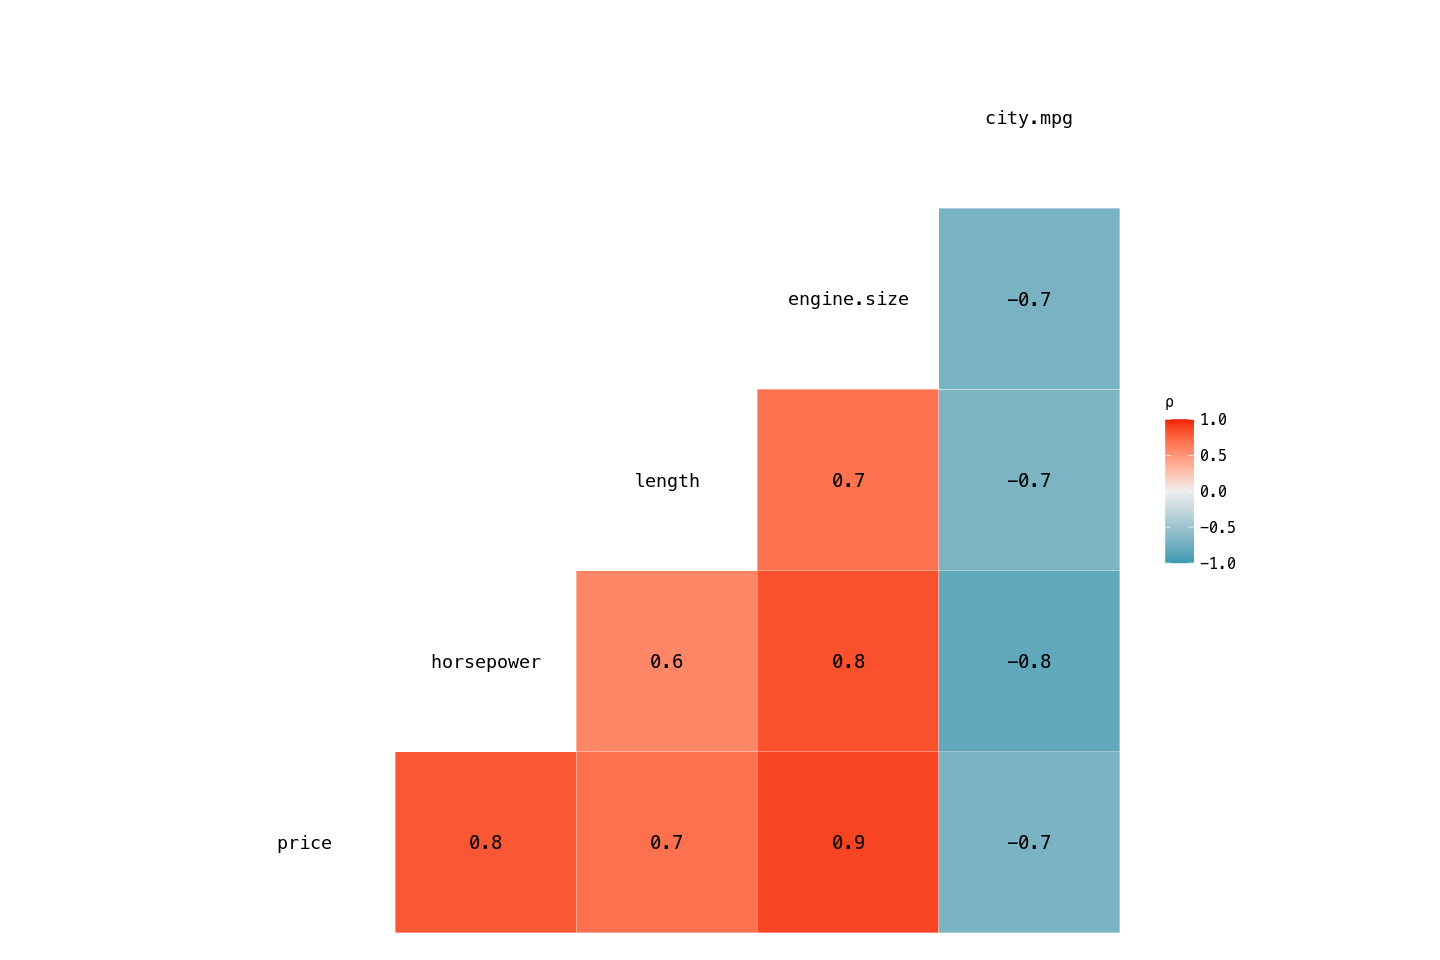

In [11]:
# criando a matriz das correlações entre as variáveis
ggcorr(autos_df, palette='RdYlGn', name=bquote(rho),
    label=TRUE, label_color='black') +
    theme(plot.caption=element_text(hjust=0, size=8))

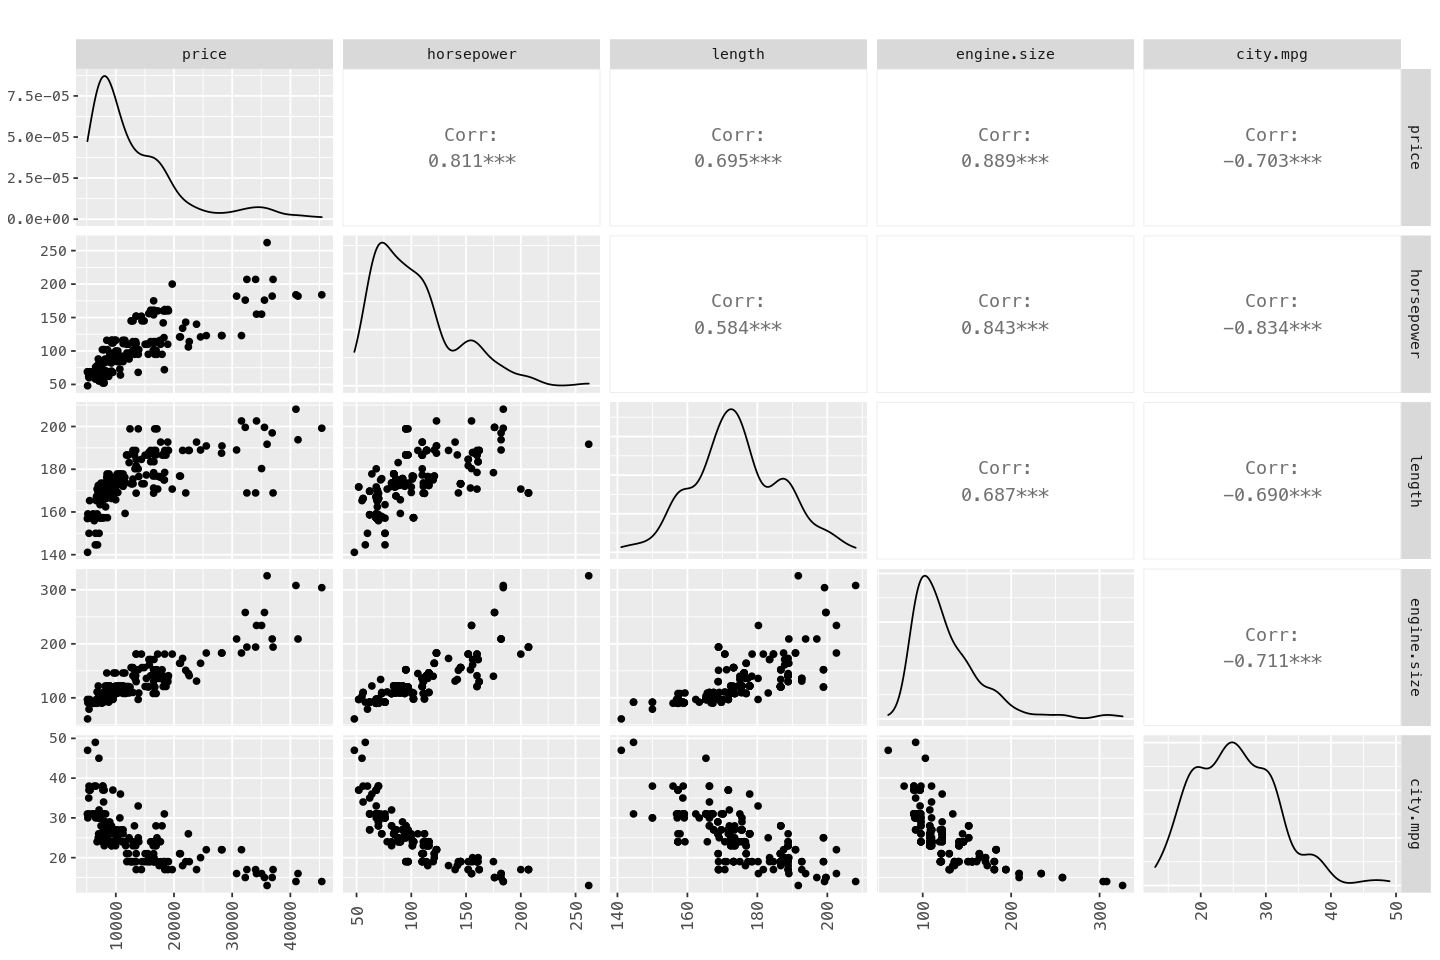

In [12]:
# criando outro gráfico com a matriz das correlações entre as variáveis
ggpairs(autos_df, columns=1:ncol(autos_df), title='', axisLabels='show') +
 theme(axis.text.x=element_text(angle=90, vjust=0.5, size=10)) +
 theme(plot.caption=element_text(hjust=0, size=8))

In [13]:
# criando o modelo de regressão linear multivariado
mod_reg1 <- lm(price ~ horsepower + length + engine.size + city.mpg, autos_df); mod_reg1

# exibindo o sumário do modelo
summary(mod_reg1)


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg, 
    data = autos_df)

Coefficients:
(Intercept)   horsepower       length  engine.size     city.mpg  
  -28057.70        52.72       112.93       115.14        57.20  



Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg, 
    data = autos_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9683.2 -1726.3    24.7  1358.5 12912.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28057.70    6953.13  -4.035 7.90e-05 ***
horsepower      52.72      16.53   3.189 0.001672 ** 
length         112.93      31.72   3.560 0.000468 ***
engine.size    115.14      12.85   8.962 2.97e-16 ***
city.mpg        57.20      81.41   0.703 0.483187    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3482 on 190 degrees of freedom
Multiple R-squared:  0.8171,	Adjusted R-squared:  0.8132 
F-statistic: 212.2 on 4 and 190 DF,  p-value: < 2.2e-16


**Item b)**

Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

A variável "city.mpg" não apresenta significância estatística no nosso modelo e deve ser removida.

In [14]:
# atualizando o modelo de regressão linear multivariado,
# retirando a variável "city.mpg"
mod_reg2 <- update(mod_reg1,  . ~ . - city.mpg, autos_df); mod_reg2

# exibindo o sumário do modelo
summary(mod_reg2)


Call:
lm(formula = price ~ horsepower + length + engine.size, data = autos_df)

Coefficients:
(Intercept)   horsepower       length  engine.size  
  -24141.90        44.93       101.94       117.14  



Call:
lm(formula = price ~ horsepower + length + engine.size, data = autos_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9358.0 -1804.1    81.3  1337.4 13042.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24141.90    4151.53  -5.815 2.51e-08 ***
horsepower      44.93      12.25   3.669 0.000316 ***
length         101.94      27.56   3.699 0.000282 ***
engine.size    117.14      12.51   9.362  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3477 on 191 degrees of freedom
Multiple R-squared:  0.8166,	Adjusted R-squared:  0.8137 
F-statistic: 283.5 on 3 and 191 DF,  p-value: < 2.2e-16


Agora o modelo (mod_reg2) têm todas as variáveis explicativas com significância estatística e pelo valor do R-quadrado ajustado consegue explicar aproximadamente 81.3% da variabilidade da variável alvo, "price".

**Item c)**

Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

Gerando os gráficos diagnósticos do modelo:

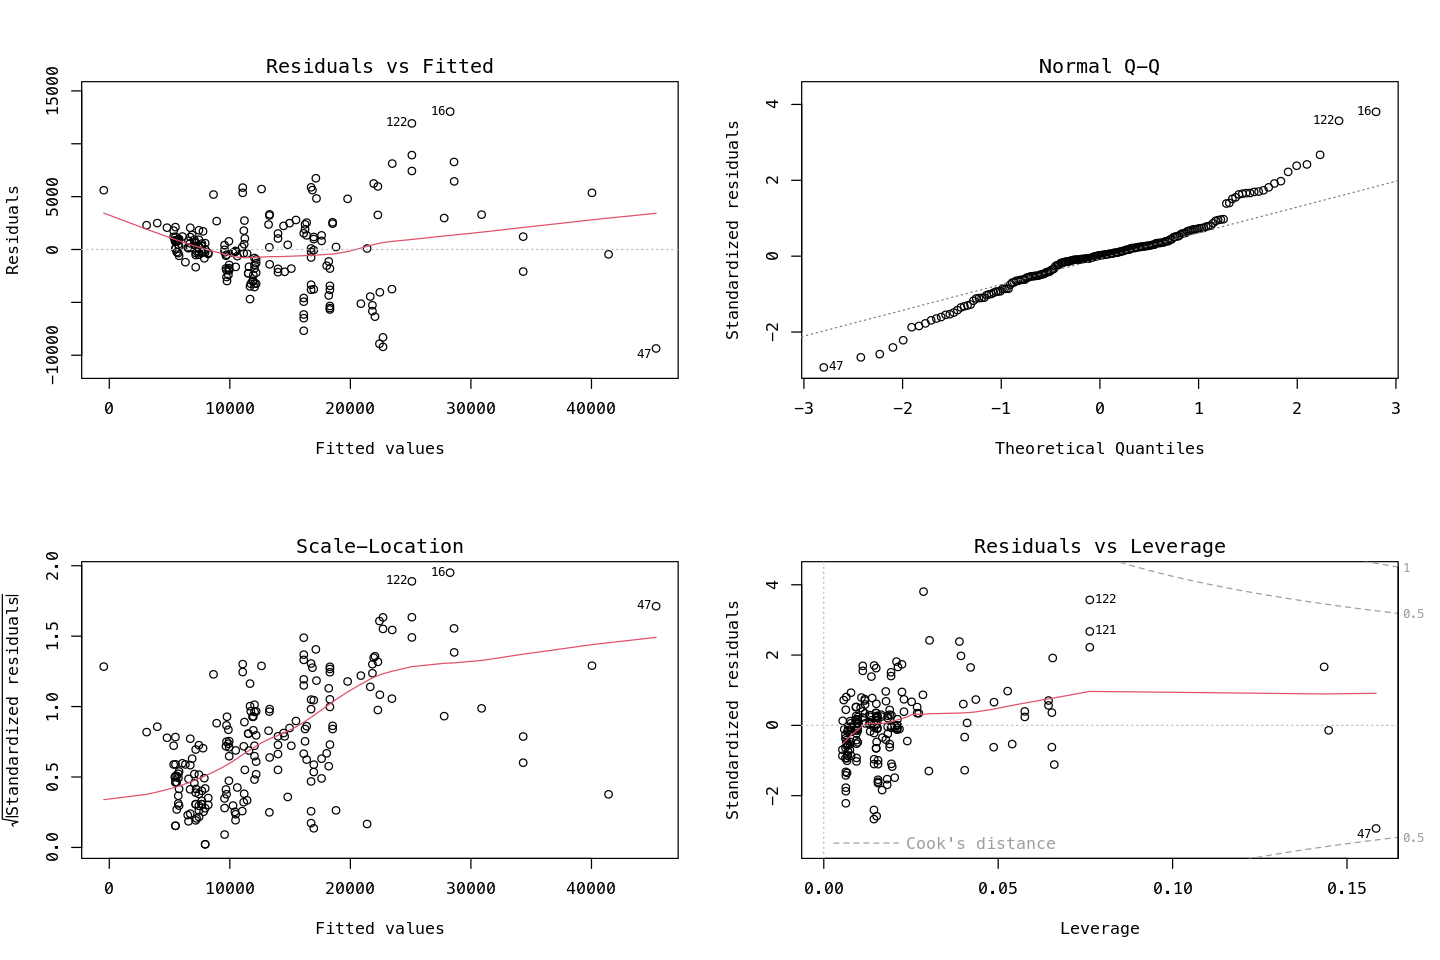

In [15]:
# exibindo os gráficos diagnósticos
par(mfrow=c(2,2))
plot(mod_reg2)

Topo esquerda:

Mostra os resíduos no eixo y contra os valores ajustados no eixo x. Não se deve observar estruturas ou padrões no gráfico. Os pontos devem se parecer como o céu estrelado à noite, ou seja, devem estar distribuídos aleatoriamente, sem formar padrões, tendências, etc. 

Neste caso, vemos claramente que os resíduos possuem uma distribuição aleatória.

Topo direita:

Gráfico qqnorm (normal) que deve ser uma linha reta se os erros são normalmente distribuídos. Se o gráfico tivesse a forma de um S ou de uma banana, precisaríamos ajustar um modelo diferente.

Neste caso, vemos claramente que nossos resíduos seguem uma distribuição normal, pois o gráfico qqnorm (normal) está em linha reta.

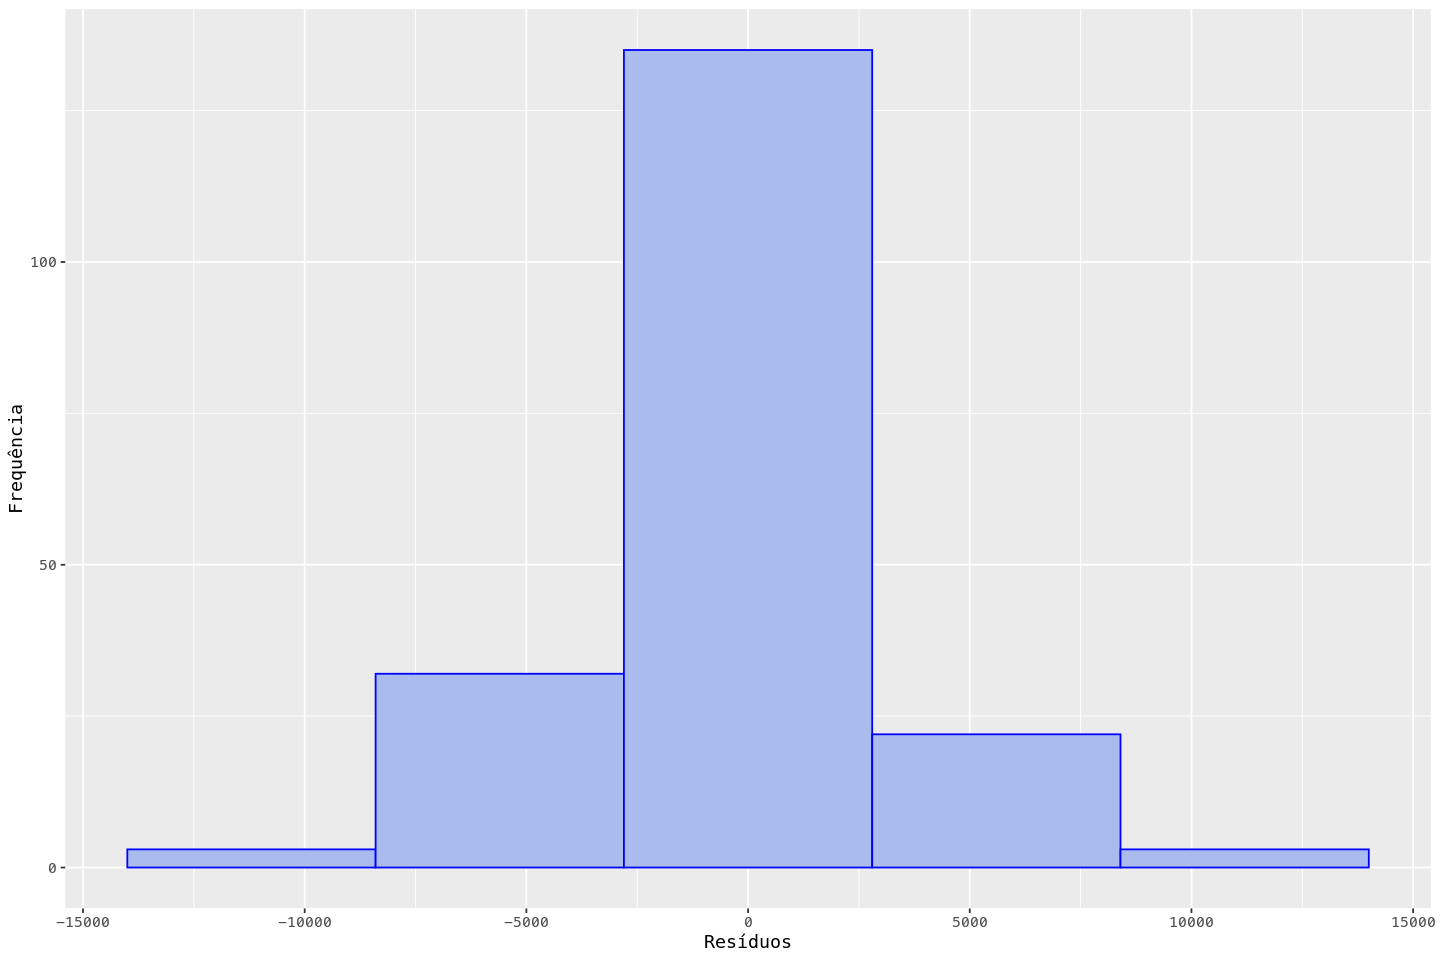

In [16]:
# exibindo o histograma dos resíduos
mod_reg2.df <- as.data.frame(residuals(mod_reg2))
names(mod_reg2.df) <- c('residuos')
ggplot(data = mod_reg2.df, aes(residuos)) +
    geom_histogram(fill='#aabbee', color='blue', stat='bin', bins=5) +
    xlab('Resíduos') +
    ylab('Frequência') +
    theme(plot.caption = element_text(hjust=0))

No histograma acima confirmamos que nossos resíduos parecem mesmo seguir uma distribuição normal. Isso indica que aparentemente nosso modelo NÃO precisa ser mais modificado.

**Item d)**

Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

Realizando o diagnóstico do modelo examinando os intervalos de confiança dos coeficientes.

In [21]:
# exibindo o diagnóstico de confiança dos coeficientes
confint(mod_reg2)

,2.5 %,97.5 %
(Intercept),-32330.63477,-15953.16050
horsepower,20.77323,69.07978
length,47.58684,156.29233
engine.size,92.45883,141.81933


Os resultados acima sugerem que podemos estar 95% confiantes de que o intervalo [20.77323, 69.07978] contém a mudança verdadeira na variável "price" para uma mudança de 1% na variável "horsepower". Tal análise pode ser inferida para as demais variáveis preditoras, "length e "engine.size".